In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun



import datetime
import seaborn as sns
sns.set()

In [2]:
%load_ext autoreload
%autoreload

In [3]:
%reload_ext autoreload

# Step 1: Read in Data

In [4]:
z_df = pd.read_csv('zillow_data.csv')
z_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
z_df.shape

(14723, 272)

The data contains the following values:

- RegionId - regions id (useful for mapping with fips?)
- RegionName - the zip code of the row
- City - city corresponding to the zip code
- State - state the zip code
- Metro - if applicable - the metro area corresponding to the city/zip code
- CountyName - county that the zip code belongs to
- SizeRank - this is based on population density (people per square mile) of the zip code --> 
    - lower scores = higher population density/more urbanized
    - higher scores = lower population density/less urbanized
- dates/home value - monthly home values from April, 1996 - April, 2018

It is important to have a good understanding of the data. 
We will therefore explore the various features.

### I started with a function for checking the total and percentages of missing values of each column.

In [6]:
missing_total = fun.missing_data(z_df)
missing_total

,Total,Percent
Metro,1043,7.084154
1997-03,1039,7.056986
1996-07,1039,7.056986
1997-06,1039,7.056986
1997-02,1039,7.056986
...,...,...
2014-05,56,0.380357
2014-04,56,0.380357
2014-02,56,0.380357
2014-01,56,0.380357


#### There are random missing values spread through a lot of the months - until we explore further this is not helpful yet.

In [7]:
# plt.figure(figsize = (13,8))
# plt.bar(missing.index[:50], missing.Percent[:50], color='purple')
# plt.title('% missing values in feature')
# plt.xlabel('feature')
# plt.xticks(rotation=60)
# plt.ylabel('% missing')
# plt.show()

### Chicago -->  I decided to only focus on Chicago zip codes because there are over 14,000 zip codes.
I believe that this is a great area for investment because:
- it is a large city with many zip codes
- it is highly urbanized and has potential for large growth / is constantly growing in population
- walkability scores 
- restaurants within walking distance
- possibility of looking into zip codes closest to public transportation
- low carbon emissions because of high population and urbanization

# Step 2: Data Preprocessing and 
# Step 3: EDA and Visualization

In [8]:
df_chicago = z_df.loc[z_df['City']=='Chicago']
df_chicago.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [9]:
# Let's make a back up to be safe from overriding
df_chicago_copy = df_chicago.copy()
# df_chicago_copy

In [10]:
chi_missing = fun.missing_data(df_chicago)
chi_missing

,Total,Percent
2006-12,1,2.439024
2007-02,1,2.439024
2000-06,1,2.439024
2006-11,1,2.439024
2006-10,1,2.439024
...,...,...
2012-01,1,2.439024
2012-02,1,2.439024
2012-03,1,2.439024
2012-04,1,2.439024


In [11]:
chi_missing.Total.nunique()

1

#### Looks like possibly only one row has null values.

In [12]:
# z_df['RegionName'].isna().any()
missing_val = df_chicago.isnull()
null_row = missing_val.any(axis=1)
rows_with_missing = df_chicago[null_row]
rows_with_missing

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1475200,1473900,1469500,1472100,1477800,1486000,1497300,1508600,1508100,1493200


#### Discovered that the zip code 60611 is our row with missing data.
- It looks like there are months with missing data for this zip code - possibly didn't have early on data?


#### Change name of RegionName column to ZipCode to elimate confusion with RegionID column

In [13]:
df_chicago.rename(columns={'RegionName': 'ZipCode'}, inplace=True)
df_chicago.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [14]:
# make sure all zip codes are Cook County 
df_chicago['CountyName'].nunique()

1

In [15]:
df_chicago['ZipCode'].nunique()

41

In [16]:
df_chicago.shape

(41, 272)

In [17]:
# fun.plot(df_chicago.sample(15))

### Now we have 41 zip codes to forecast with.

In [18]:
# test =  df_chicago.groupby(['ZipCode'])['2018-01'].mean()
# test

In [19]:
# fun.plot(df_chicago)

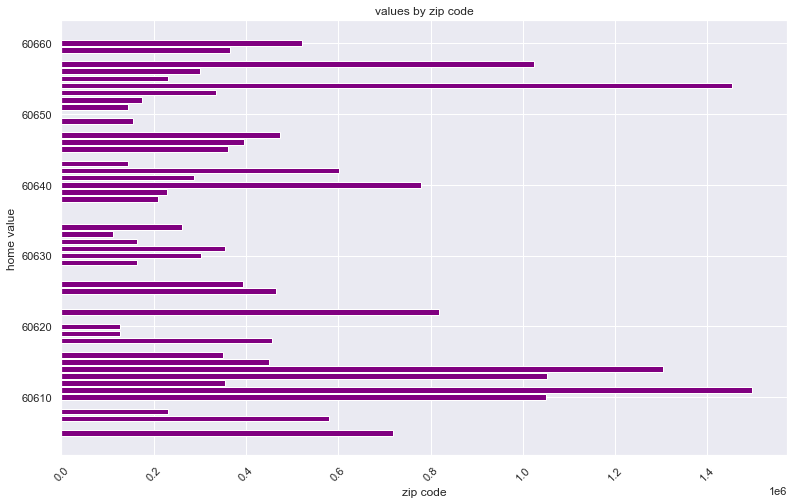

In [20]:
plt.figure(figsize = (13,8))
plt.barh(df_chicago.ZipCode, df_chicago['2018-01'], color='purple')
plt.title('values by zip code')
plt.xlabel('zip code')
plt.xticks(rotation=45)
plt.ylabel('home value')
plt.show()

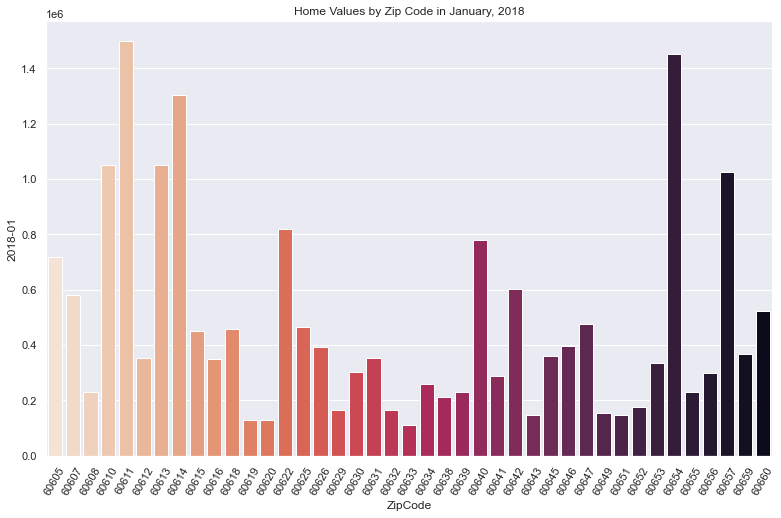

In [26]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='2018-01', data=df_chicago, palette="rocket_r")
plt.title('Home Values by Zip Code in January, 2018')
plt.xticks(rotation=60)
plt.show()

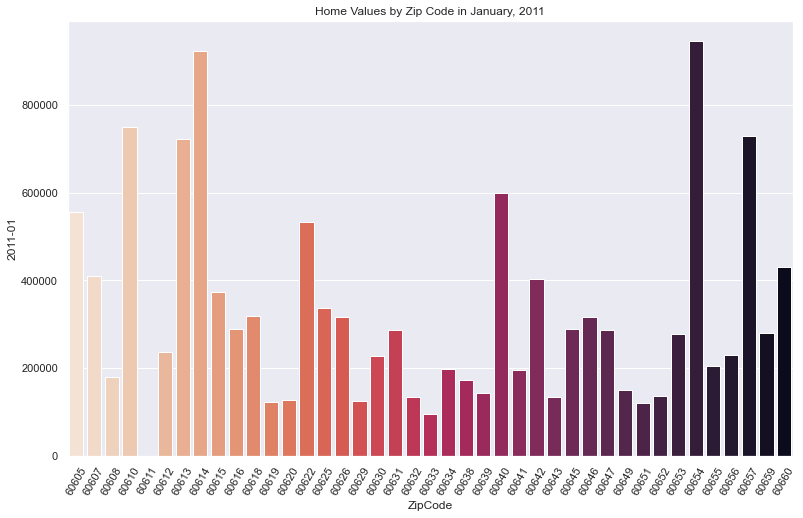

In [25]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='2011-01', data=df_chicago, palette="rocket_r")
plt.title('Home Values by Zip Code in January, 2011')
plt.xticks(rotation=60)
plt.show()

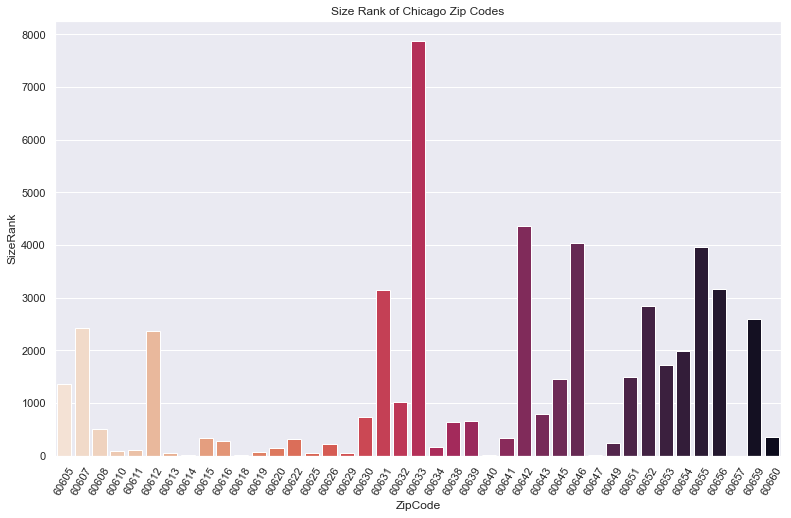

In [27]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='SizeRank', data=df_chicago, palette="rocket_r")
plt.title('Size Rank of Chicago Zip Codes')
plt.xticks(rotation=60)
plt.show()

#### From here I decided to use size rank to filter through and lessen the zip code amount.
- I did not have a set amount in mind.

In [66]:
df_chicago.dropna(inplace=True)
df_chicago['ZipCode'].nunique()

40

In [110]:
# filter zipcodes with a size rank in the bottom 50% (low score = highly urbanized zipcodes)
urban = df_chicago.SizeRank.quantile(q=0.50)
print(f'Size Rank 50% cutoff value: {urban}')
top_zips_df = df_chicago[df_chicago['SizeRank'] < urban]
print(f'Amount of zip codes: {top_zips_df.ZipCode.nunique()}')
top_zips_df.head()


Size Rank 50% cutoff value: 568.5
Amount of zip codes: 20


,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [68]:
top_zips_df.to_csv('top_zips_with_all_columns.csv', index=False)

In [36]:
## go back and make sure mapping dictionary is updated!!

In [69]:
# making a dictionary of zip codes with their corresponding region id's 
# because I may need them for plotting or identification of zip code location
# region
region_dict = {}
zip_list = top_zips_df.ZipCode.unique()
for i in zip_list:
    region = top_zips_df[top_zips_df['ZipCode']==i].RegionID.values[0]
    region_dict[i] = region

In [70]:
region_dict[60657]

84654

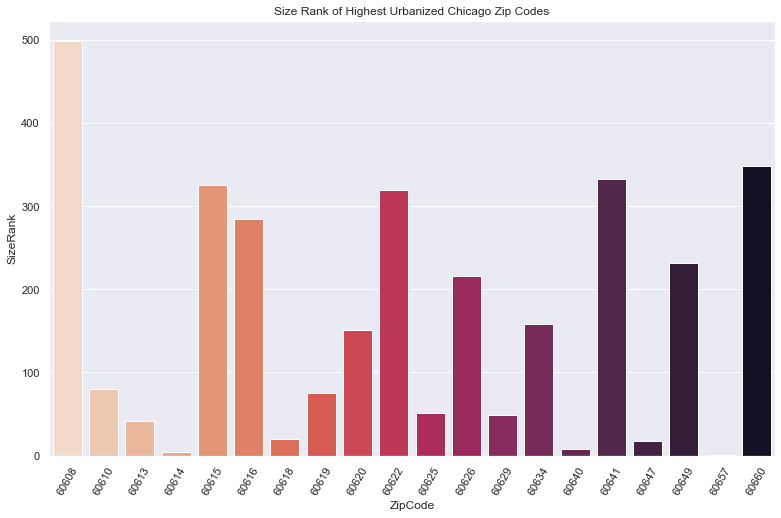

In [71]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='SizeRank', data=top_zips_df, palette="rocket_r")
plt.title('Size Rank of Highest Urbanized Chicago Zip Codes')
plt.xticks(rotation=60)
plt.show()

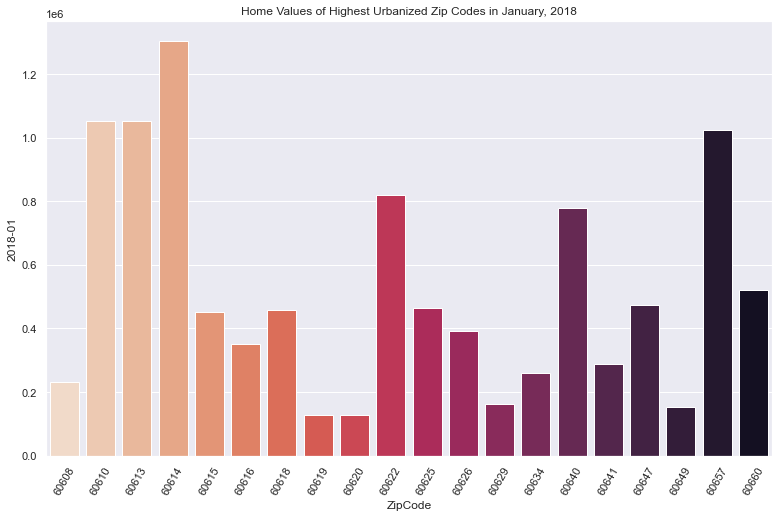

In [72]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='2018-01', data=top_zips_df, palette="rocket_r")
plt.title('Home Values of Highest Urbanized Zip Codes in January, 2018')
plt.xticks(rotation=60)
plt.show()

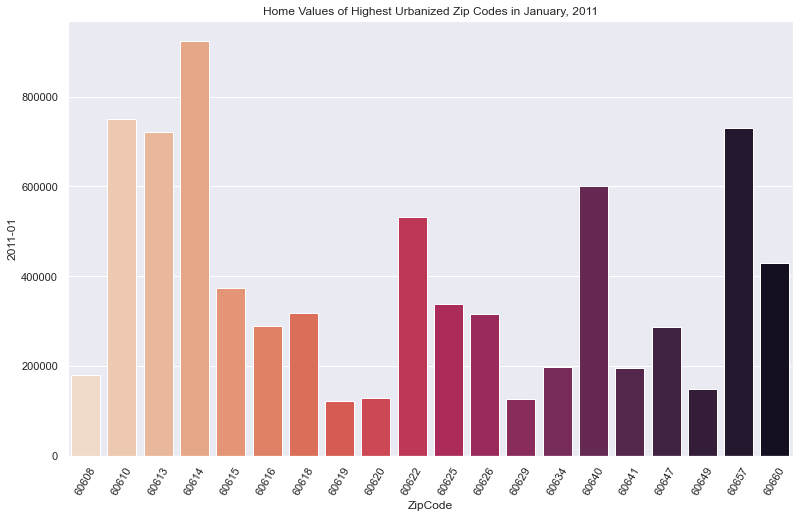

In [73]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='2011-01', data=top_zips_df, palette="rocket_r")
plt.title('Home Values of Highest Urbanized Zip Codes in January, 2011')
plt.xticks(rotation=60)
plt.show()

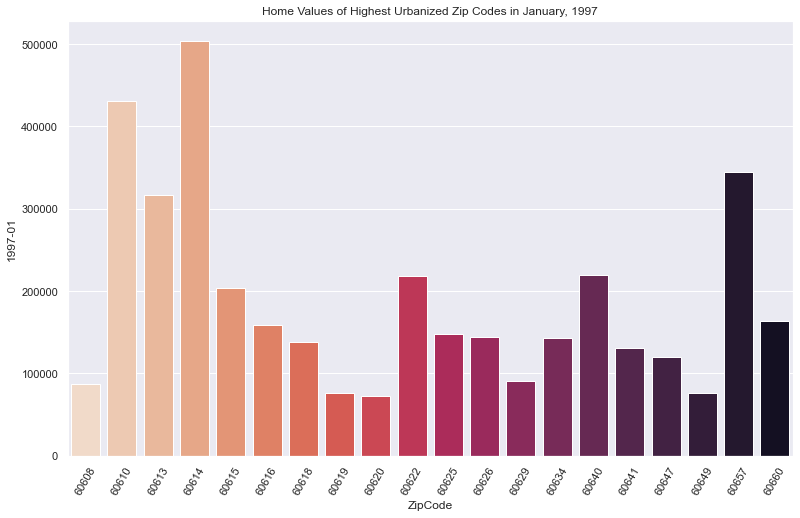

In [74]:
plt.figure(figsize=(13,8))
sns.barplot(x='ZipCode', y='1997-01', data=top_zips_df, palette="rocket_r")
plt.title('Home Values of Highest Urbanized Zip Codes in January, 1997')
plt.xticks(rotation=60)
plt.show()

### I wanted to drop some unnecessary columns for plotting 

In [111]:
plotting_df = top_zips_df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
plotting_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [76]:
## Reset index 
plot_df = plotting_df.reset_index(drop=True)
plot_df.head()

,ZipCode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
2,60640,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
3,60647,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
4,60618,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [77]:
## change zipcodes to string
plot_df["ZipCode"] = plot_df["ZipCode"].astype(str)

In [78]:
## transpose dates to rows
plot_df = plot_df.transpose()
plot_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
1996-04,334200,498100,216500,122700,142600,297900,93400,148900,76400,435200,71900,146800,150900,77400,160600,217000,195300,135700,166000,89800
1996-05,335400,500900,216700,122800,143100,300400,94100,149300,77000,435200,72500,147700,150100,77600,160400,216900,196600,136200,165600,89800
1996-06,336500,503100,216900,122800,143400,302600,94600,149600,77400,435100,73000,148300,149300,77600,160100,216900,197800,136400,165200,89800
1996-07,337600,504600,217000,122700,143300,304700,94800,149700,77700,434600,73300,148500,148400,77600,159800,216800,198900,136300,164800,89700


In [79]:
## Renaming columns
new_header = plot_df.iloc[0] ## grab first row for new header
plot_df = plot_df[1:] ## take all data after first row
plot_df.columns = new_header ## reassign all columns to zipcodes

In [80]:
plot_df.head()

ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
1996-04,334200,498100,216500,122700,142600,297900,93400,148900,76400,435200,71900,146800,150900,77400,160600,217000,195300,135700,166000,89800
1996-05,335400,500900,216700,122800,143100,300400,94100,149300,77000,435200,72500,147700,150100,77600,160400,216900,196600,136200,165600,89800
1996-06,336500,503100,216900,122800,143400,302600,94600,149600,77400,435100,73000,148300,149300,77600,160100,216900,197800,136400,165200,89800
1996-07,337600,504600,217000,122700,143300,304700,94800,149700,77700,434600,73300,148500,148400,77600,159800,216800,198900,136300,164800,89700
1996-08,338500,505500,217100,122400,142900,306600,94700,149700,77700,433900,73400,148400,147600,77500,159500,216800,199900,135800,164400,89500


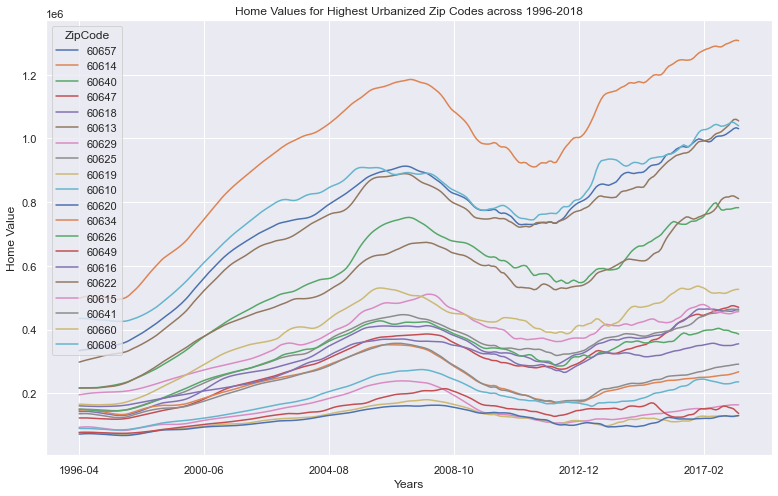

In [81]:
# fun.plot(plot_df)
plot_df.plot(figsize=(13, 8))
plt.title('Home Values for Highest Urbanized Zip Codes across 1996-2018')
plt.xlabel('Years')
plt.ylabel('Home Value')
plt.show()

### From the plot above - It is clear that the 2008 economic crash had a large impact on values in Chicago 
- I decided to discard of all dates prior to 2011 where it starts to even out

In [82]:
plot_df = plot_df.loc[plot_df.index >= '2011-01']
plot_df.head()

ZipCode,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
2011-01,729300,923000,600000,286500,317400,722000,125300,337500,122200,749200,127600,196600,316500,148800,289000,532700,372500,195100,429900,179800
2011-02,730200,925000,601600,285800,316300,723400,124300,339500,122200,748600,126900,195000,317900,148700,288100,531700,370600,194600,428800,179400
2011-03,730700,923300,599700,283800,314000,724200,123100,340600,122500,747300,125500,193200,319600,147200,287300,530900,368800,193700,426200,178200
2011-04,730000,916600,590500,282100,311400,722300,121500,340500,123300,745300,124600,190600,321400,144800,286400,530600,368900,191200,419400,176900
2011-05,730100,912400,578900,281700,308200,724100,119800,339500,123500,744200,123400,187600,320300,143200,286200,528700,369900,187600,413200,176800


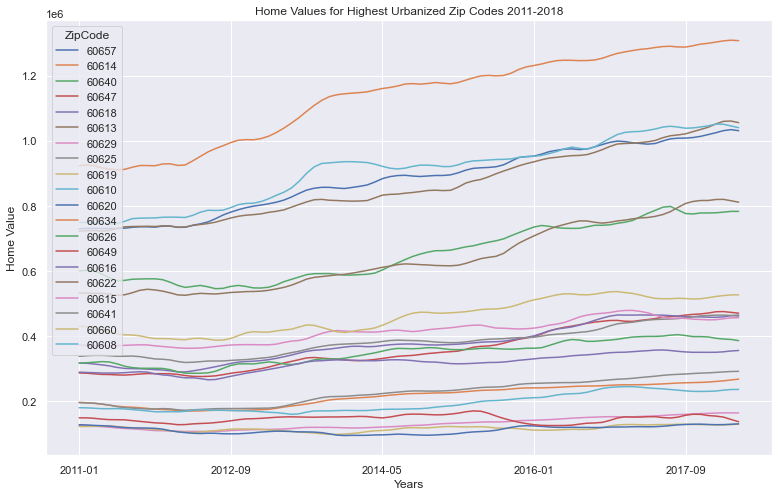

In [83]:
# # fun.plot(plot_df)
plot_df.plot(figsize=(13, 8))
plt.title('Home Values for Highest Urbanized Zip Codes 2011-2018')
plt.xlabel('Years')
plt.ylabel('Home Value')
plt.show()

### OK!  Looks good - these are the zip codes and years we will model with.

In [93]:
# save our filtered dataframe for future use and to prevent overriding
# NO INDEX with function ran !!
# fun.get_index_ready(plot_df)
plot_df.to_csv('plot_df.csv', index=False)

# Step 4: Reshape from Wide to Long Format

In [112]:
top_zips_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [113]:
for col in top_zips_df.columns:
    if col < '2011-01':
        top_zips_df.drop([col], inplace=True, axis=1)

top_zips_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,2011-01,2011-02,2011-03,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,729300.0,730200.0,730700.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,923000.0,925000.0,923300.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,600000.0,601600.0,599700.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,286500.0,285800.0,283800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,317400.0,316300.0,314000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [114]:
def melt_data(df): # from flatiron starter notebook
    melted = pd.melt(df, id_vars=['RegionID','ZipCode', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='Time', value_name='Value')
    melted['Time'] = pd.to_datetime(melted['Time'], format='%Y-%m')
    melted = melted.dropna(subset=['Value'])
    return melted

In [245]:
df = melt_data(top_zips_df)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2011-01-01,729300.0
1,84616,60614,Chicago,IL,Chicago,Cook,4,2011-01-01,923000.0
2,84640,60640,Chicago,IL,Chicago,Cook,8,2011-01-01,600000.0
3,84646,60647,Chicago,IL,Chicago,Cook,17,2011-01-01,286500.0
4,84620,60618,Chicago,IL,Chicago,Cook,20,2011-01-01,317400.0


In [246]:
df.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'Time', 'Value'],
      dtype='object')

In [247]:
df.set_index('Time', inplace = True)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,Value
Time,,,,,,,,
2011-01-01,84654,60657,Chicago,IL,Chicago,Cook,1,729300.0
2011-01-01,84616,60614,Chicago,IL,Chicago,Cook,4,923000.0
2011-01-01,84640,60640,Chicago,IL,Chicago,Cook,8,600000.0
2011-01-01,84646,60647,Chicago,IL,Chicago,Cook,17,286500.0
2011-01-01,84620,60618,Chicago,IL,Chicago,Cook,20,317400.0


In [248]:
df.drop(['RegionID', 'City', 'State', 'Metro', 
                     'CountyName', 'SizeRank'], inplace=True, axis=1)
df.head()


,ZipCode,Value
Time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [249]:
# keep index
df.to_csv('chicago_melted.csv')

In [250]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Time', length=1760, freq=None)

In [259]:
train = df.loc['2011-01-01':'2015-03-01']
test = df.loc['2015-04-01':]

In [265]:
train.head(), train.shape

(            ZipCode     Value
 Time                         
 2011-01-01    60657  729300.0
 2011-01-01    60614  923000.0
 2011-01-01    60640  600000.0
 2011-01-01    60647  286500.0
 2011-01-01    60618  317400.0, (1020, 2))

In [264]:
test.head(), test.shape

(            ZipCode      Value
 Time                          
 2015-04-01    60657   909400.0
 2015-04-01    60614  1185700.0
 2015-04-01    60640   673800.0
 2015-04-01    60647   359000.0
 2015-04-01    60618   376800.0, (740, 2))

In [125]:
zip_dict = {}
zip_list = df.ZipCode.unique()
for x in zip_list:
    ts = (test[test['ZipCode']==x]['Value'].copy())
    ts.name = x 
    zip_dict[x] = ts

In [ ]:
# test2 = zip_dict[60647].resample('MS').mean()
# test2

In [266]:
zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [268]:
zip_dfs[4].head()

,Value
Time,
2011-01-01,317400.0
2011-02-01,316300.0
2011-03-01,314000.0
2011-04-01,311400.0
2011-05-01,308200.0


In [143]:
import statsmodels.graphics.tsaplots as tsa
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

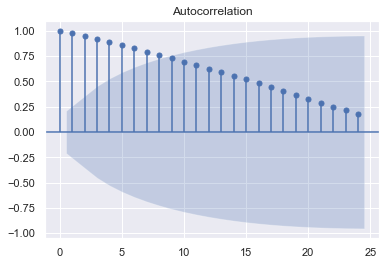

In [222]:
tsa.plot_acf(test2,lags=24);
# tsa.plot_acf(zip_dfs[4]);

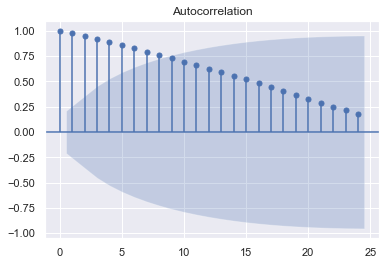

In [223]:
tsa.plot_acf(zip_dict[60647],lags=24);

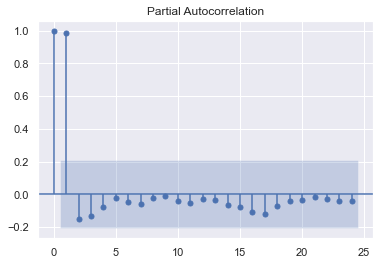

In [225]:
tsa.plot_pacf(zip_dict[60647],lags=24);

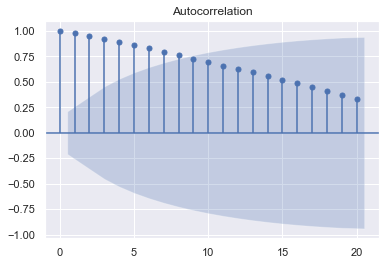

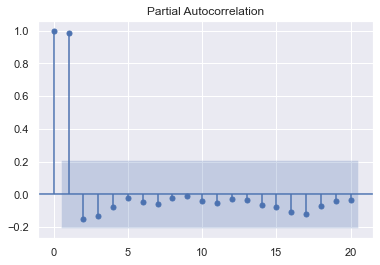

In [150]:
plot_acf(zip_dict[60647]);
plot_pacf(zip_dict[60647]);

In [269]:
train_dfs = []
train_list = train.ZipCode.unique()
for x in train_list:
    train_dfs.append(pd.DataFrame(train[train['ZipCode']==x][['Value']].copy()))

In [272]:
train_dfs[4].head()

,Value
Time,
2011-01-01,317400.0
2011-02-01,316300.0
2011-03-01,314000.0
2011-04-01,311400.0
2011-05-01,308200.0


In [270]:
test_dfs = []
test_list = test.ZipCode.unique()
for x in test_list:
    test_dfs.append(pd.DataFrame(test[test['ZipCode']==x][['Value']].copy()))

In [271]:
test_dfs[4].head()

,Value
Time,
2015-04-01,376800.0
2015-05-01,378900.0
2015-06-01,380900.0
2015-07-01,382100.0
2015-08-01,382500.0


# Step 5: ARIMA Modeling

In [258]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [277]:
ans = []
for train, name in zip(train_dfs, train_list):
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1504.6381573586273
Result for 60657 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6452089.846683958
Result for 60657 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 940.4473575082025


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1085.8440465244048
Result for 60657 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 898.5883955953069
Result for 60657 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 953.0230973140028
Result for 60657 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 651.474679342588


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 755.6720608046817
Result for 60657 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 536164.9021963628
Result for 60657 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 6248830.97610196
Result for 60657 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 944.1255266586518


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2226.165819642525
Result for 60657 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1139.54548321347
Result for 60657 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1166.1746563584243
Result for 60657 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 665.0256824678186


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60657 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 980.1798147339125
Result for 60657 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 743.6636690816564
Result for 60657 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 738.7687160989473


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 802.4838136316337
Result for 60657 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 755.5569301221051
Result for 60657 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 760.4405763106413
Result for 60657 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 512.9366547134555


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1024.139347235407
Result for 60657 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 913.593801153183
Result for 60657 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 685.3994163148908
Result for 60657 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 714.62584564707
Result for 60657 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2236.6768196437833
Result for 60657 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 735.950784118473
Result for 60657 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 694.7583430309897


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 505.1754283215574
Result for 60657 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1591.719257894332
Result for 60657 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 971.8061902236075
Result for 60657 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1045.9232933071307
Result for 60657 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 760.5871344986481


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1063.507634107724
Result for 60657 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 769.1814087187809
Result for 60657 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 791.6854890039734
Result for 60657 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 515.834930258965


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 834.5962565008061
Result for 60657 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 913.8535226382386
Result for 60657 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 790.1802195754285
Result for 60657 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 742.078946022701


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 954.4777754336868
Result for 60657 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 710.9693674345172
Result for 60657 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 745.1169415534529


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 506.8303465429185
Result for 60657 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60657 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 910.6797466238346


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 756.5259863861007
Result for 60657 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 708.0941301465009


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 971.8216734337075
Result for 60657 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 694.0738356094238
Result for 60657 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 758.068596565527
Result for 60657 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 474.29538038539687


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 993.5666101974505
Result for 60657 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 894.5275238602708
Result for 60657 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 681.3889096088532
Result for 60657 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 714.9233289839646


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60657 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 728.2106680298333
Result for 60657 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 681.813437850384
Result for 60657 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 683.3710249084015
Result for 60657 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 476.31494361548346


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 834.2932082520301
Result for 60614 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1530.1469117435738
Result for 60614 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 10114492.194562295
Result for 60614 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 977.6341995607303


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60614 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1023.2729278969869
Result for 60614 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 946.2222013710376
Result for 60614 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 918.1202916431137
Result for 60614 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 680.938700733153


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60614 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 620.5941224831752
Result for 60614 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 861165.5872865234
Result for 60614 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 10142994.000003027
Result for 60614 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 983.9716455557723


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60614 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2235.800393642433
Result for 60614 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1267.3965670928355
Result for 60614 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1188.1418717164813
Result for 60614 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 694.6082432844262
Result for 60614 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 644.6535322121467
Result for 60614 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1023.6462342382976
Result for 60614 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 783.8536267159396
Result for 60614 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 780.0769445332757


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60614 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 888.4434746954681
Result for 60614 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 792.0628768750655
Result for 60614 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 943.2884810197259
Result for 60614 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 545.2855724377557
Result for 60614 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 525.605727028951
Result for 60614 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 962.6755619532255
Result for 60614 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 724.2811976377521
Result for 60614 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 753.7038858439031


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60614 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 767.0052056372792
Result for 60614 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 724.3466285452154


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 530.7676510422491


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60614 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 486.57719171240603
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1019.8168877373391
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1318.4308600142444
Result for 60614 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 802.5933288739443


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60614 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1018.944745205551
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 779.354980078227
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 781.1859024639053
Result for 60614 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 547.5576716126726
Result for 60614 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 549.2095330074012
Result for 60614 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 953.7790324765374
Result for 60614 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1271.7080530472604


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 832.7422015753993


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Result for 60614 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2087.5045328936326
Result for 60614 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 741.7219859521254


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 722.8762706813719
Result for 60614 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 528.0559526736168


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 511.83210981117895
Result for 60614 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 946.5265581537318
Result for 60614 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 975.8492351081399
Result for 60614 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 741.8037351592337


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 560.7338985459704
Result for 60614 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 715.2668231145341
Result for 60614 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 977.7422321499278
Result for 60614 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 488.49458045381397
Result for 60614 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 490.48255546417533
Result for 60614 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 930.6134553626639
Result for 60614 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 715.2796198815755
Result for 60614 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 788.0273818432422


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 889.0756972412539
Result for 60614 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 718.2014434946589
Result for 60614 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 715.8409454636435
Result for 60614 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 482.35684762948483
Result for 60614 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 462.4891393154263
Result for 60640 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1472.4364409207278
Result for 60640 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 4029575.822081234


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 920.0409818002439


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1135.930618447241
Result for 60640 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 936.5189330996315
Result for 60640 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 871.159855881082
Result for 60640 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 654.7140102321248


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1065.7946580106789
Result for 60640 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 364386.0204421757
Result for 60640 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 4074090.5894766566
Result for 60640 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 918.3868245555402
Result for 60640 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2239.4194680279043
Result for 60640 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1213.9682836164159
Result for 60640 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1138.51433533057
Result for 60640 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 648.61957214074


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2181.1416514493167
Result for 60640 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 990.8717340754582
Result for 60640 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 750.6596717836517
Result for 60640 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 760.1313012124903


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1102.1649031521913
Result for 60640 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 769.180849149215
Result for 60640 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 748.037806221802
Result for 60640 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 535.0745277256698


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 514.6688836158391
Result for 60640 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 920.8597792608246
Result for 60640 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 691.4588065183058
Result for 60640 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 735.3319631997547
Result for 60640 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2195.709705341831
Result for 60640 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 730.6837914251284
Result for 60640 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 692.0047617995408
Result for 60640 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 512.302300166546


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 469.429398903204
Result for 60640 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1008.8011325404499
Result for 60640 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1290.2796034526536
Result for 60640 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 783.5136326103842


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1048.5323460590548
Result for 60640 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 761.0853397528239


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 762.4298008279133
Result for 60640 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 534.2999816004077


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1026.7298767008604
Result for 60640 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 939.0124972060302


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 702.8301820501473
Result for 60640 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 802.6230437020771
Result for 60640 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1281.2473376874382


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 725.4634175355344
Result for 60640 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 703.2215708208638
Result for 60640 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 514.662652368103


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60640 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 944.3203845577774
Result for 60640 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 709.8320535365632
Result for 60640 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 742.4958957328039


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 941.5965896633886
Result for 60640 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 710.2352103330888
Result for 60640 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 712.2071110737537
Result for 60640 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 491.0296880310804
Result for 60640 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 492.9600974656075
Result for 60640 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 937.7127789266478
Result for 60640 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 667.300147599923
Result for 60640 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 743.913586414416


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 902.2230485823957
Result for 60640 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 686.8794066433211
Result for 60640 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 667.6186253195237
Result for 60640 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 482.9331206903938


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 465.9022196101322
Result for 60647 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1408.3710997169085
Result for 60647 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1052.5166380006601
Result for 60647 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 883.4826955263521
Result for 60647 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1191.513705732445


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 879.9417980238134
Result for 60647 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 873.3353943512047
Result for 60647 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 635.9032229734869
Result for 60647 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 630.1434606470496
Result for 60647 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1347.8567871900655


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1014.0279249386789
Result for 60647 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 879.1025069656649
Result for 60647 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2298.642965865819
Result for 60647 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1064.489492237807
Result for 60647 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1012.1326728339935


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60647 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 614.9552060166989
Result for 60647 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 565.7581611381181
Result for 60647 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 921.1241205599788


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 706.4403731082124
Result for 60647 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 726.3503418712467
Result for 60647 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1105.7161000046883
Result for 60647 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 724.781622321873


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 706.248945472951
Result for 60647 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 505.6115781144394


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 486.02961515244067
Result for 60647 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 849.9226596081393
Result for 60647 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 653.1146399948949
Result for 60647 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 694.3338465367158
Result for 60647 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2045.266892820122
Result for 60647 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 689.1407052468722


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 655.0239039614355
Result for 60647 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 497.5797674869967


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 458.1715483823857
Result for 60647 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 927.4017844483469
Result for 60647 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1003.1889748050967
Result for 60647 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 746.9925717477462


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1330.3184112577828
Result for 60647 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 709.5947096714219
Result for 60647 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 708.7797868066541


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 508.162201778739
Result for 60647 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 508.3593432976745
Result for 60647 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 864.7993541504377
Result for 60647 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 655.9495833416962
Result for 60647 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 724.2176025503658
Result for 60647 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2261.282664416173


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 675.6104417109004
Result for 60647 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 652.5286619115159


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60647 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 503.61059747345655


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 480.1270702423184
Result for 60647 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 841.2882869581925
Result for 60647 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 640.7552654445731
Result for 60647 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 664.049812675573


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1200.101447391259
Result for 60647 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 640.8044654991949
Result for 60647 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 641.5183890525453
Result for 60647 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 452.7189434557218
Result for 60647 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 454.2616665183631
Result for 60647 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 822.4549784493007


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 606.1116581039055
Result for 60647 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 647.3502474357005


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60647 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1085.1026168339408
Result for 60647 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 622.4013736870753
Result for 60647 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 608.1013145441877


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 440.08483947937975
Result for 60647 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 426.2391155267052
Result for 60618 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1416.5214826551894
Result for 60618 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1059.4476779993217
Result for 60618 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 895.1814052488579


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 985.2647283123285
Result for 60618 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 893.9614499812935
Result for 60618 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 864.2107449437149
Result for 60618 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 637.8916442642158


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60618 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1144.277458544329
Result for 60618 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1355.7839921838756
Result for 60618 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1084.6278131704205
Result for 60618 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 890.2001128172825
Result for 60618 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60618 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1070.7996347326016
Result for 60618 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1084.8012057158044


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 631.2689429375009
Result for 60618 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2139.343543166508
Result for 60618 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 923.7004848241309
Result for 60618 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 695.3572660188969
Result for 60618 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 720.4329125697069


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 960.5402058538589
Result for 60618 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 720.102456399222
Result for 60618 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 700.6112817798006
Result for 60618 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 493.2696074812484
Result for 60618 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 473.1018335372331
Result for 60618 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 862.3999713908361
Result for 60618 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 639.6651696333478
Result for 60618 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 692.2250989714921
Result for 60618 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2030.1947727538327


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 686.0331459781461
Result for 60618 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 650.6918246486225


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 481.35886340490424


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 445.91356751616394
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 934.7294672524498
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 973.8663038726468
Result for 60618 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 740.4994808981219


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1096.0217881900032
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 753.0085903696287
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 703.7866386780456
Result for 60618 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 498.300444742514


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60618 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1083.3405697636038
Result for 60618 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 870.6372687975885
Result for 60618 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 653.8406418475261
Result for 60618 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 716.4422950246944
Result for 60618 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60618 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 672.5462437518029


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 655.1023028910312


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 483.2276480428873
Result for 60618 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2007.9378627431436
Result for 60618 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 841.2558421111561
Result for 60618 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 639.6385842129034
Result for 60618 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 665.6936450050632


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 870.6206898882564
Result for 60618 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 639.897621995693
Result for 60618 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 639.4770677341036
Result for 60618 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 439.09479071746017
Result for 60618 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 443.3343663599587
Result for 60618 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 821.8907373390041


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 583.7708863583562
Result for 60618 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 645.2539714609876


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60618 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 930.8910012831825
Result for 60618 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 616.2455263479586
Result for 60618 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 591.556173823313
Result for 60618 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 430.85596050098644
Result for 60618 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 422.0024906024057
Result for 60613 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1501.324532466268
Result for 60613 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6435249.956167088
Result for 60613 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 911.5813744361697


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 745.0235002734532
Result for 60613 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 859.3070702757283
Result for 60613 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 876.8939344624187
Result for 60613 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 629.8551734399786
Result for 60613 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 580.407311439814


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60613 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 525891.7911947763
Result for 60613 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 6488820.855770156
Result for 60613 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 914.4992749858163
Result for 60613 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60613 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1240.5490845196614


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1163.2880365069036
Result for 60613 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 642.0361422420298


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 595.9126232733992
Result for 60613 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 958.3602520665233
Result for 60613 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 727.7593982024648
Result for 60613 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 726.9494725739395


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1318.3066773838636
Result for 60613 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 741.8768057999104
Result for 60613 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 723.9306192360779
Result for 60613 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 499.9259756672132


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60613 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1097.9085434188396
Result for 60613 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 903.6642307972938
Result for 60613 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 681.9214428751579
Result for 60613 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 706.1092518621565


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1021.3727263081105
Result for 60613 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 720.0232381535659
Result for 60613 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 680.2242576151875
Result for 60613 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 500.5929389747545


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1067.1979535272385
Result for 60613 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 950.9020274018601
Result for 60613 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1151.257792124394
Result for 60613 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 748.5670488267116
Result for 60613 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1078.6730586487352
Result for 60613 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 759.7559770384464
Result for 60613 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 812.9291515280381


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 501.47832795639766
Result for 60613 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 506.04944794645246
Result for 60613 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 903.7788235302185


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1107.3277256228637
Result for 60613 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 735.4371478854391


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60613 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1099.3276386047787
Result for 60613 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 704.0368210544368
Result for 60613 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 683.4500761127397
Result for 60613 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 501.31678078880293


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 481.4469354471496
Result for 60613 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 918.409909801664
Result for 60613 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 698.3898953829826
Result for 60613 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 714.5507333014505


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1139.172781196485
Result for 60613 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 698.7498978987684
Result for 60613 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 700.0465630662632
Result for 60613 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 473.65199590347316


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1096.7896270452693
Result for 60613 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 903.4141172194619
Result for 60613 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 668.4868514080008
Result for 60613 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 702.0560959284134


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1038.9428319666188
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 689.5495867996168
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 664.4645724866571
Result for 60613 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 475.6766751816133


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60613 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1091.8523929757023
Result for 60629 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1311.1140864620322
Result for 60629 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 162710.86072588505
Result for 60629 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 802.0953839521472


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1116.9707813368477
Result for 60629 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 824.731535090524
Result for 60629 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 757.4672834836755
Result for 60629 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 568.3839180783227


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1004.2023608586172
Result for 60629 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1252.0742646869755
Result for 60629 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 159564.88783733107
Result for 60629 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 786.0968548672414
Result for 60629 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60629 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 988.0664243907498
Result for 60629 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 939.5285318568717
Result for 60629 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 550.0737666894636


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60629 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 830.57092558073
Result for 60629 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 619.8618569005771
Result for 60629 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 652.9400992842204


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 943.8583701585995
Result for 60629 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 636.052447893681
Result for 60629 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 620.603417203587
Result for 60629 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 446.16308993465475


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 962.2130874148583
Result for 60629 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 764.7146226294602
Result for 60629 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 564.6484264283689
Result for 60629 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 625.9455052529681
Result for 60629 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2016.8388560493813
Result for 60629 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 610.6365678691596
Result for 60629 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 563.4804041097436


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 436.3754522125032
Result for 60629 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2022.7100888120854
Result for 60629 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 848.3078155542145
Result for 60629 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 626.4766906926592


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 670.4675794646374


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1087.8063179939531
Result for 60629 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 663.8058366457597
Result for 60629 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 628.5403351740409
Result for 60629 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 443.6143969736554


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 904.7939772970174
Result for 60629 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 791.8980031433783


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 591.38256012963
Result for 60629 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 648.6974868563143


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1092.9570505677227
Result for 60629 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 607.815723088119
Result for 60629 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 592.4727863451915


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 427.0273745384035


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 947.6714483666417
Result for 60629 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 750.4635011771707
Result for 60629 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 566.8107338565403
Result for 60629 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 605.501178671763


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1045.695753317566
Result for 60629 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 564.9853626966034
Result for 60629 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 567.1660455521815
Result for 60629 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 403.5172913259082


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1036.3599108110184
Result for 60629 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 734.271594201268
Result for 60629 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 538.8475969206971
Result for 60629 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 590.6303901552473


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 755.9264796269259
Result for 60629 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 550.7823454403424
Result for 60629 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 526.8805331444872


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 401.0456654708695


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60629 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 749.4901124708263
Result for 60625 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1421.1797366955793
Result for 60625 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1354849.2877238165
Result for 60625 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 886.1013708186515


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 727.335087316446
Result for 60625 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 896.1436263659465
Result for 60625 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 838.1276022489203
Result for 60625 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 636.822003418238


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 576.1709786509879
Result for 60625 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 117483.13095615731
Result for 60625 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1363865.1981802043
Result for 60625 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 882.1000672072423


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2062.014813453839
Result for 60625 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1166.073513190043
Result for 60625 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1094.283173577462
Result for 60625 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 626.86393199982
Result for 60625 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 578.9487320866627
Result for 60625 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 910.564516828667
Result for 60625 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 692.0554155527997
Result for 60625 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 714.5919346907942


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1100.7960667684567
Result for 60625 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 713.2921384263246
Result for 60625 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 701.9948629718391
Result for 60625 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 500.5558438709026


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 482.8264880786848
Result for 60625 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 844.1707720483121
Result for 60625 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 635.4357250788472
Result for 60625 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 684.8097165390257
Result for 60625 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2150.754241115892
Result for 60625 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 672.2549926787303


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 643.2537605974536


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 480.9300367288712
Result for 60625 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 446.8280698904517
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 924.8076703872135
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1081.9475053728827
Result for 60625 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 737.8782493334227


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 918.4666362157294
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 702.9469786726678
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 704.9394005607052
Result for 60625 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 503.1105830157046


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60625 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 505.0598482471371
Result for 60625 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 870.9246081568064
Result for 60625 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 652.6116367518313


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 714.4057497928046
Result for 60625 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60625 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 673.5076882207192


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 653.7843105993489
Result for 60625 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 487.14767343544486


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 468.39156162119514
Result for 60625 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 842.834138560471
Result for 60625 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 718.7171254265287
Result for 60625 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 664.9550639479744


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1211.4234488602044
Result for 60625 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 632.5869497675196


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 637.438322435935
Result for 60625 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 429.9589502336489
Result for 60625 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 439.40378478028265
Result for 60625 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 827.6930076091546
Result for 60625 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 600.8560608619485


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60625 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 648.942378850079


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1118.7542362619365
Result for 60625 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 624.9284970571955
Result for 60625 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 660.6421677791819


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 433.8841034073987


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 414.5667184401763
Result for 60619 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1306.5924791117106
Result for 60619 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 970.4624066084598
Result for 60619 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 828.2834890697779
Result for 60619 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1034.5570014453822


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 851.525899459575
Result for 60619 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 818.6238684448764
Result for 60619 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 579.6908086284315


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60619 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1070.7299219964568
Result for 60619 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1247.3767978536264
Result for 60619 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 988.7993957675839
Result for 60619 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 814.0410934421212
Result for 60619 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60619 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 984.4174414051646
Result for 60619 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 988.5463421406168
Result for 60619 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 572.9179969721436
Result for 60619 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60619 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 873.0108222892443
Result for 60619 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 651.6749767850949
Result for 60619 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC C

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1166.3367784737384
Result for 60619 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 673.2219149578509
Result for 60619 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 656.3939664471775
Result for 60619 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 476.96722761266665
Result for 60619 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 457.3640060542176


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 817.9881567122388
Result for 60619 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 610.9743140201687
Result for 60619 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 664.891605962498
Result for 60619 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60619 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 653.0807461152579
Result for 60619 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 612.9604643659097


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 478.44033178878396
Result for 60619 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 440.2152670825256
Result for 60619 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 891.7582864044394


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 731.0751616714305
Result for 60619 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 719.065539569801


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60619 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1084.877529978426
Result for 60619 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 675.3564071214641
Result for 60619 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 675.6332599342153
Result for 60619 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 483.14982448178887


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60619 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1038.0266781505236
Result for 60619 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 844.8750728903808
Result for 60619 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 641.2989453391955
Result for 60619 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 695.6127366526853


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60619 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1082.209632062054
Result for 60619 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 654.6485150073544
Result for 60619 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 689.8311683016973
Result for 60619 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 481.65478045859425


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60619 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 968.5665926788216
Result for 60619 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 819.0534534042113
Result for 60619 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 627.1909566705917
Result for 60619 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 646.5821903552329


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60619 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1144.4643720099211
Result for 60619 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 626.4589734279067
Result for 60619 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 628.3218876745666
Result for 60619 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 436.1962451293996
Result for 60619 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 438.0794956889097
Result for 60619 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 798.00250311767
Result for 60619 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 604.4425353037211
Result for 60619 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 629.8895158771879


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1157.7297845991948
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 619.8587744778664
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 605.1863043110162
Result for 60619 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 436.54124317972844


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 418.79830272533036
Result for 60610 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1508.761551795365
Result for 60610 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1128.0205087007553
Result for 60610 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 960.5132627695466


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60610 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 955.7699686777518
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 957.7340789467486
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 933.9387936682219
Result for 60610 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 687.2950292873392


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1239.916763304371
Result for 60610 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 563469.6790958092
Result for 60610 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1172.231846443634


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 963.4792237139121
Result for 60610 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60610 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1247.5024389291025
Result for 60610 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1169.8056814489964


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 667.9955639637737
Result for 60610 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 633.9397879223134
Result for 60610 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1013.9588563088106


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60610 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 776.8038280123521
Result for 60610 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 797.1086070566654


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60610 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1032.3425252244074
Result for 60610 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 796.3052815723823
Result for 60610 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 930.8180621556655
Result for 60610 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 552.4471004809544
Result for 60610 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 533.3791208384055
Result for 60610 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 950.4693041353528
Result for 60610 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 721.3459944825107
Result for 60610 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 788.0513518031992
Result for 60610 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2069.0099986638747


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 759.1634617183206
Result for 60610 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 722.69028469702


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 546.7781339659911
Result for 60610 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 506.80167487437114


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1022.7267611643618
Result for 60610 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1163.8040145944483
Result for 60610 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 819.2228170798295


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 936.8652762141405
Result for 60610 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 783.141228234149
Result for 60610 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 785.1380881459753
Result for 60610 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 555.929196731978
Result for 60610 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 557.7641038933231
Result for 60610 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 958.8800643154


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1115.564292037636
Result for 60610 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 838.8060405916692
Result for 60610 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60610 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 750.6780866286108
Result for 60610 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 731.552407033415


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 547.6378765114114
Result for 60610 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 530.8100938705612
Result for 60610 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 949.1865237173607


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 718.7807203273198
Result for 60610 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 760.5737542735723


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60610 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1141.8663089828337
Result for 60610 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 718.0005199609789
Result for 60610 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 947.3814215943673
Result for 60610 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 500.99126468763615
Result for 60610 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 502.9901553160882
Result for 60610 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 937.4719928414609
Result for 60610 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 697.4948826360021


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60610 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 754.8993649118787


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60610 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1044.5366231624319
Result for 60610 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 708.1323720745322
Result for 60610 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 912.144311225829
Result for 60610 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 493.145581886563
Result for 60610 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 475.295518896578
Result for 60620 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1300.3553939944043


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 172906.37899215374
Result for 60620 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 821.8007757080301
Result for 60620 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1101.3415208305964


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 823.2553130077018
Result for 60620 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 763.3703561769343
Result for 60620 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 552.1895402048291
Result for 60620 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 518.4929172938115
Result for 60620 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 17984.148686036864


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60620 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 152053.3858309722
Result for 60620 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 775.0093520633461
Result for 60620 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60620 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1054.080065855642
Result for 60620 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 990.0308656202498
Result for 60620 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 566.4238317434937
Result for 60620 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 517.7890373253956
Result for 60620 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 867.4169221505404
Result for 60620 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 646.3755700956056
Result for 60620 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 685.8442724827504


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1100.7626734544083
Result for 60620 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 669.0658942864181
Result for 60620 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 646.0850433332514
Result for 60620 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 464.68854714815603
Result for 60620 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 443.3722836677644
Result for 60620 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 810.7258970300638
Result for 60620 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 602.777369639765
Result for 60620 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 653.701783190046
Result for 60620 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2157.8555209470524


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 637.9464355335462
Result for 60620 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 601.632566987719
Result for 60620 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 460.36340147405485


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 422.5318760818254
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 879.2202857040946
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 730.8087538094661
Result for 60620 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 704.5921466458384


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1076.651094616535
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 668.3112192675183
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 668.3097205765199
Result for 60620 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 462.27456447246743
Result for 60620 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 471.92114722229854
Result for 60620 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 830.8996099753587


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 623.9744081281186
Result for 60620 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 680.3309412946693


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60620 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1116.725763975843
Result for 60620 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 641.5036920098242
Result for 60620 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 625.2215219814732
Result for 60620 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 461.2251482643529


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 441.034792192835
Result for 60620 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 820.07079593684
Result for 60620 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 618.7824787661601
Result for 60620 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 650.2494753831617


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1002.3126921681315
Result for 60620 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 617.9751303600317
Result for 60620 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 619.7344651167466
Result for 60620 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 428.50490055039717
Result for 60620 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 426.9100094017769
Result for 60620 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 799.1267633538849
Result for 60620 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 596.5534080624433
Result for 60620 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 631.0321709441961


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 990.4692596742216
Result for 60620 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 612.1073556352752
Result for 60620 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 597.3690358313996
Result for 60620 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 428.76306852424807
Result for 60620 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 411.54724224270086
Result for 60634 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1361.5806940827124
Result for 60634 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 403978.21512520965


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 871.1332774491028
Result for 60634 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1096.4928671966761
Result for 60634 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 883.3066088133758


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 812.2767133133674
Result for 60634 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 622.5200583507424
Result for 60634 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 602.5768616557309


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60634 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 40050.848179754954
Result for 60634 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 394987.7840006802
Result for 60634 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 829.4296655510171
Result for 60634 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1110.4528834862901
Result for 60634 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1042.6554670559265
Result for 60634 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 603.3178775516196


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 566.4731515382803
Result for 60634 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 888.7311642593768
Result for 60634 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 664.8559029703304
Result for 60634 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 687.1216793748131


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 969.0616528215651
Result for 60634 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 687.5468578249942
Result for 60634 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 671.0074275059128
Result for 60634 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 485.9123352475969
Result for 60634 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1020.0106572454205


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 814.7694017387998
Result for 60634 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 608.7246051942939
Result for 60634 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 659.5486652589765
Result for 60634 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1935.6045445466793


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 646.7725323691297
Result for 60634 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 627.0006542874191
Result for 60634 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 464.0778501840368


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2015.03973610208
Result for 60634 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 902.9314591080363
Result for 60634 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 671.7183489645679
Result for 60634 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 706.0303286855985


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 973.6651756098873
Result for 60634 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 703.8205831533846
Result for 60634 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 673.7140720013989
Result for 60634 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 487.92557256859885


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 488.7713549155617
Result for 60634 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 843.6130237531399
Result for 60634 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 633.6729771791327
Result for 60634 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 684.4357925673143


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60634 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1127.6129730909845
Result for 60634 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 625.7750809697256
Result for 60634 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 634.7908412537926
Result for 60634 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 466.64027948555577


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 448.69480407148444
Result for 60634 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 789.4188568535352
Result for 60634 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 666.9754247632914
Result for 60634 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 633.5210643285493


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1040.1866335082443
Result for 60634 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 596.2633228247012
Result for 60634 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 668.470656227515
Result for 60634 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 415.97423923841194


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1032.7230479506022
Result for 60634 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 774.8556852612805
Result for 60634 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 565.2562413915269
Result for 60634 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 618.8142334934491


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 912.90784146952
Result for 60634 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 598.3759216047109
Result for 60634 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 560.4933374722592


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 415.2669996841163


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60634 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1068.3429697698573
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1412.9136269547664
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1056.189633159506
Result for 60626 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 886.8439416892303


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provi

Result for 60626 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1159.7213851496492
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 895.8757157039811
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 842.3519884939276
Result for 60626 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 631.5096671436208


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60626 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 639.6125117704602
Result for 60626 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1352.058940580598
Result for 60626 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1081.47608398284
Result for 60626 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 878.537845607517
Result for 60626 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2266.783997599037
Result for 60626 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1067.7658262596226
Result for 60626 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1015.1882305853732


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 622.2541673370607
Result for 60626 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60626 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 947.3561839639254
Result for 60626 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 717.521001672278
Result for 60626 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 745.5088454186352
Result for 60626 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1117.2829269373824
Result for 60626 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 738.6485589574716
Result for 60626 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 718.5927278368547
Result for 60626 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 513.8216335436758


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1075.6620628049595
Result for 60626 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 881.8084943065273
Result for 60626 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 662.6078963309592
Result for 60626 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 712.8581699859119


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60626 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 699.8427698437848
Result for 60626 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 664.2464829368006
Result for 60626 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 499.4346561450008


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60626 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 965.091396945507
Result for 60626 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1058.369797209659
Result for 60626 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 767.9111657298062


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1310.5660081177325
Result for 60626 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 790.0594910372783
Result for 60626 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 733.6036986690419
Result for 60626 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 518.4993138187094


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60626 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1122.1132368576293
Result for 60626 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 899.4168684112246
Result for 60626 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 673.7323979452239
Result for 60626 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 778.8665957875929


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60626 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2149.645800178007
Result for 60626 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 696.1061419378448
Result for 60626 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 674.726290187909
Result for 60626 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 500.68563535923704
Result for 60626 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60626 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 904.1017313937948
Result for 60626 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 684.7362548093661


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 715.1641240813311


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60626 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 912.8113788366336
Result for 60626 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 685.0453515589835
Result for 60626 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 684.6533442911393
Result for 60626 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 480.7949278780169


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60626 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1049.6593124514686
Result for 60626 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 887.9534934577646
Result for 60626 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 648.4624011609368
Result for 60626 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 695.6856745737173
Result for 60626 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1117.5978589686429
Result for 60626 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 665.8236932276205
Result for 60626 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 649.3650140653232


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 472.2156678063154
Result for 60626 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1614.0987150145188
Result for 60649 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1333.5685724650414
Result for 60649 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 994.2816191535761
Result for 60649 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 824.3260838821263


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1123.6289005905664
Result for 60649 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 843.8767692445434
Result for 60649 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 871.3052294767967
Result for 60649 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 585.1760322881129


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provi

Result for 60649 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1150.7893001279065
Result for 60649 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 24056.94042898672
Result for 60649 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 214384.89333509246
Result for 60649 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 808.5227743567509


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2157.8918193981513
Result for 60649 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1005.8715145350039
Result for 60649 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 956.4859742513456
Result for 60649 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 567.2648342140226


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2202.682053373974
Result for 60649 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 876.0493573678592
Result for 60649 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 657.5995163198113
Result for 60649 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 695.7182913459382


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 945.5325861040582
Result for 60649 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 675.1061595943866
Result for 60649 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 649.7855008394542
Result for 60649 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 469.0200222296293
Result for 60649 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 450.6965998501199
Result for 60649 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 818.0329674493506
Result for 60649 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 610.5102527350061
Result for 60649 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 667.7927681000399
Result for 60649 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2169.5025733951684


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 649.2368338544212
Result for 60649 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 613.6902139583716
Result for 60649 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 471.5264280596974


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 430.1755531645255
Result for 60649 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 893.5166228956134
Result for 60649 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 998.3854447907253
Result for 60649 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 714.7297413287142


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1075.4670782076073
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 714.0750160527869
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 669.0626036393289
Result for 60649 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 477.76069883123165


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1036.564307560236
Result for 60649 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 838.3219105567268
Result for 60649 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 669.1507596958747
Result for 60649 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 689.3553577506275


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60649 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1025.885176617573
Result for 60649 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 644.6631525920272
Result for 60649 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 622.9350401114561
Result for 60649 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 467.30695378639416


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1221.5300238609548
Result for 60649 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 836.4339055305048
Result for 60649 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 634.12703412216
Result for 60649 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 663.567365550923


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1227.8874229077367
Result for 60649 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 632.0586529215211
Result for 60649 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 634.1082893533533
Result for 60649 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 440.56976191500735
Result for 60649 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 444.66695876248235
Result for 60649 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 816.3542717325842
Result for 60649 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 600.524716532441
Result for 60649 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 643.8453968401145


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1015.6504478269201
Result for 60649 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 622.0150651219373
Result for 60649 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 601.6961800922214
Result for 60649 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 441.75784114743567


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60649 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 419.82201942259735
Result for 60616 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1405.7270249893372
Result for 60616 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1049.0840173144568
Result for 60616 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 884.0242246631948


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1207.2067884580172
Result for 60616 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 900.5953722722692
Result for 60616 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 877.1047947971181
Result for 60616 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 635.7624195439874


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1109.4572410262558
Result for 60616 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 85164.55583557204
Result for 60616 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1075.1421380833597
Result for 60616 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 879.1917216999068


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2178.48677386388
Result for 60616 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1151.69598909108
Result for 60616 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1081.0376342782738
Result for 60616 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 615.8533402301971
Result for 60616 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2154.5397804819845
Result for 60616 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 918.8726620367053
Result for 60616 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 699.8799472307556


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 731.2327532645309
Result for 60616 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 952.3033886442861
Result for 60616 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 718.4506495805771
Result for 60616 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 759.1323095172653


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 505.50645968073644


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 485.94323983262
Result for 60616 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 858.6284308095683
Result for 60616 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 639.4990412153817
Result for 60616 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 700.8729266484514


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1359.5735798373712
Result for 60616 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 683.856409636709
Result for 60616 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 641.4988881305811


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 496.2354940451344
Result for 60616 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 458.22692801919277
Result for 60616 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 937.0022008995454


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1074.187992506336
Result for 60616 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 752.1373802233965


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 966.2378472898914
Result for 60616 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 714.562169743551
Result for 60616 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 714.0812231242381
Result for 60616 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 509.23228939896444


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1032.000976884275
Result for 60616 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 876.9018621111542
Result for 60616 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1039.4169906017542
Result for 60616 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 729.1029548664644
Result for 60616 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1046.3748460867594
Result for 60616 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 683.9757940881406
Result for 60616 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 664.9884703421225


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 500.0502799407176


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1019.046585006839
Result for 60616 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 859.1986718796201
Result for 60616 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 767.3087718892763
Result for 60616 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 678.2929586640571


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1086.7860044281686
Result for 60616 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 648.6766807207422
Result for 60616 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 757.931923170501
Result for 60616 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 448.4693613948484
Result for 60616 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 452.98471500262207
Result for 60616 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 843.1592863154037
Result for 60616 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 614.2520625879316
Result for 60616 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 663.219347822968


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60616 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 979.1091186563806
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 636.7987113489588
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 619.4449676797582


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 451.8028423318672
Result for 60616 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 429.87071661395726
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1468.471754075085
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 3429600.160771687
Result for 60622 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 905.7766461310977


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1020.4595185324209
Result for 60622 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 896.0023104918995
Result for 60622 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 836.5671651087539
Result for 60622 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 644.2607204771303
Result for 60622 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 584.8911354652198
Result for 60622 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 285077.8661400669


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60622 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 3428111.6955796815
Result for 60622 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 906.0921728700047
Result for 60622 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2203.691997400931
Result for 60622 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1210.121202787241
Result for 60622 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1135.1243104520117
Result for 60622 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 639.9719142450887


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60622 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 593.0185097611686
Result for 60622 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 948.6834846551111
Result for 60622 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 710.8133493016169
Result for 60622 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 726.0629226875092


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1145.7715482646483
Result for 60622 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 731.391348322681
Result for 60622 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 711.6488559297379
Result for 60622 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 512.7729924206739


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1082.077657276525
Result for 60622 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 887.9004657533123
Result for 60622 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 657.210222219245
Result for 60622 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 700.1239785693887
Result for 60622 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2086.872146385224
Result for 60622 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 702.5547926909704
Result for 60622 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 669.2352901306754


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 490.5649292835867


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1089.8980151342996
Result for 60622 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 957.3685348898634
Result for 60622 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1125.2012025924585
Result for 60622 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 748.0277008323727
Result for 60622 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1092.0108999617694
Result for 60622 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 722.9426326499258
Result for 60622 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 724.7034567405886


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 514.6999310439043
Result for 60622 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 515.0838529360194
Result for 60622 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 900.0947845271972


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 756.1047496838322
Result for 60622 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 725.894847930795
Result for 60622 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2290.370024929015
Result for 60622 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 687.5908058660407
Result for 60622 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 669.5613166400796


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 492.6136686411251
Result for 60622 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 472.6763145980028
Result for 60622 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 894.9748470696646
Result for 60622 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 664.869094148488
Result for 60622 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 691.5099096922271


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1163.2786032221254
Result for 60622 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 665.6456276052476
Result for 60622 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 669.1800872066809
Result for 60622 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 464.28558028724837
Result for 60622 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1169.2170377540197
Result for 60622 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 879.0741924653795
Result for 60622 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 630.5702699085232
Result for 60622 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 677.4605084743193


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1150.465291769568
Result for 60622 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 656.0846856384542
Result for 60622 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 635.7463759080488
Result for 60622 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 453.3041886141761


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 824.4412435664549
Result for 60615 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1431.2953277784331
Result for 60615 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1068.1452618287599
Result for 60615 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 870.5624905425899


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60615 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1014.0818218938186
Result for 60615 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 871.2403112074646
Result for 60615 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 827.0356225870371
Result for 60615 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 626.1545260447456
Result for 60615 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1036.7626388507526
Result for 60615 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1370.2176761291955


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1030.6777474270348
Result for 60615 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 869.0021582799609
Result for 60615 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2117.2328476960533
Result for 60615 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1082.1760946081492
Result for 60615 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1028.9440548898133


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 615.1733772509457
Result for 60615 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 569.4794545685054
Result for 60615 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 918.3876077460021


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 702.3407816664215
Result for 60615 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 717.3863722501578


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60615 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1164.4196614551558
Result for 60615 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 720.3161851919739
Result for 60615 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 704.1363687267462
Result for 60615 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 503.06942145197183
Result for 60615 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 486.57407559907864
Result for 60615 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 857.7047416794185
Result for 60615 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 651.6381634808731
Result for 60615 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 689.9332113703465
Result for 60615 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2101.0613377294258
Result for 60615 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 686.4951989949155


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 653.1519498698603
Result for 60615 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 493.92596775520616


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 457.7240699647608
Result for 60615 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 929.3055515349117
Result for 60615 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 711.0967501555294
Result for 60615 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 737.596241651987


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1081.1163570054714
Result for 60615 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 755.0599427996356
Result for 60615 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 778.4003968088083
Result for 60615 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 502.1663697207398
Result for 60615 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 504.1520624427259


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 866.4679903711534
Result for 60615 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 661.3927624877608


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 716.4252640861303
Result for 60615 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1040.1396890333779


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 679.3458894588458
Result for 60615 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 660.2454510054685


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 496.0837798764068


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 477.92931373544315
Result for 60615 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 867.2923029030791
Result for 60615 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 665.2808194174196
Result for 60615 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 687.3846062384943


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1108.447333754546
Result for 60615 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 665.2183524125393
Result for 60615 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 667.1539269007999
Result for 60615 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 458.578637954787
Result for 60615 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 460.23996376606215
Result for 60615 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 846.3228198974605
Result for 60615 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 634.4884376652493
Result for 60615 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 671.4798815943959


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1071.2865917810516
Result for 60615 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 651.0679066448521
Result for 60615 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 634.988563497115
Result for 60615 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 457.1218633074115
Result for 60615 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 441.46055374257867
Result for 60641 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1364.0824646216993
Result for 60641 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1021.5314107863242


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 873.000161932052
Result for 60641 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 978.0852945244355
Result for 60641 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 879.9708132761357


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 820.8484397102737
Result for 60641 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 624.4320609273962
Result for 60641 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 604.6956761010861


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60641 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1304.288625011381
Result for 60641 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 981.1445697883997
Result for 60641 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 865.3746121796994
Result for 60641 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60641 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1029.8698983014942


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 979.1580556045096
Result for 60641 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 605.5694205244886
Result for 60641 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 569.3424977950058
Result for 60641 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 903.2146179235802


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 686.9287431245873
Result for 60641 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 696.5538519230128
Result for 60641 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1049.8044962283775
Result for 60641 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 699.4555560683938


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 690.3752257310213
Result for 60641 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 491.3941986448213
Result for 60641 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 944.5857950028552
Result for 60641 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 831.6107070987825


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60641 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 617.9135290290942
Result for 60641 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 668.737470090269
Result for 60641 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2048.0418796569925
Result for 60641 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 669.8180584475125


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 619.6113742539852
Result for 60641 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 471.28555615226253
Result for 60641 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2021.7636923806242


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 915.9340258457719
Result for 60641 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 684.6047879263512
Result for 60641 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 716.8462508855772


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1142.7404720198792
Result for 60641 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 721.5000811104978
Result for 60641 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 686.5991316374684
Result for 60641 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 493.3937597928988


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 493.87399641811106
Result for 60641 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 853.6991579651063
Result for 60641 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 640.5574202669036


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 693.7656066326856
Result for 60641 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60641 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 659.3672466482739


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 642.3057666937202
Result for 60641 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 472.13462128889404


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 454.21981990063665
Result for 60641 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 826.4579182214097
Result for 60641 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 618.9181908001763
Result for 60641 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 644.2560509159707


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1023.0563066352048
Result for 60641 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 618.942685887489
Result for 60641 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 620.7418094468633
Result for 60641 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 425.1603550222074


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1003.2026126292923
Result for 60641 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 809.7859246671109
Result for 60641 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 571.7007412703696
Result for 60641 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 627.3908131528433


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1098.0482987149514
Result for 60641 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 606.3317558649862
Result for 60641 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 634.719964057466
Result for 60641 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 420.67214628504024


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1080.4700518323261
Result for 60660 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1439.0482724658566
Result for 60660 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1074.9134857987651
Result for 60660 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 898.9503311948424


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1086.8114624947511
Result for 60660 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 913.4492994079616
Result for 60660 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 862.1231031335501
Result for 60660 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 645.1644409416581


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1143.7975042693367
Result for 60660 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1377.5865668142537
Result for 60660 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1036.2810982244055
Result for 60660 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 893.2838445839568
Result for 60660 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60660 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1177.561270621585


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1104.555279185951
Result for 60660 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 623.1800678740307
Result for 60660 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2267.8978386211597
Result for 60660 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 972.561642960424


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 723.3360171971639
Result for 60660 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 765.4637318368196
Result for 60660 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 956.6726809288491
Result for 60660 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 758.1220712729414
Result for 60660 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 730.6294280721622


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 530.1997292942658
Result for 60660 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 993.2064303121108
Result for 60660 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 911.4622018163215
Result for 60660 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 681.6666532844404


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 758.6612295205643
Result for 60660 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2082.0424547086327
Result for 60660 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 723.8376365642615


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 683.6223487125068
Result for 60660 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 521.9254404994607
Result for 60660 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60660 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 991.6042777207492


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 746.3745231307602
Result for 60660 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 786.8833464108181


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1099.177309487302
Result for 60660 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 800.4241627533532
Result for 60660 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 748.3619111623601
Result for 60660 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 533.151318984565
Result for 60660 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1175.5518502645027
Result for 60660 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 932.5425911703593
Result for 60660 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 758.6008032270796
Result for 60660 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 800.4279120106576


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2207.0439586064826
Result for 60660 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 720.2604532440129


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 699.4473424208132
Result for 60660 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 523.8929818850805
Result for 60660 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60660 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 923.966417979501
Result for 60660 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 702.8344808664605


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 738.703425890224


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1190.6979306984633
Result for 60660 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 700.666026950826
Result for 60660 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 701.2925164872166
Result for 60660 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 492.7475596104932


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 791.0299753857776
Result for 60660 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 905.7695947311545
Result for 60660 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 667.3499045161844
Result for 60660 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 720.402889338241


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 953.1677485822275
Result for 60660 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 687.2372855027652
Result for 60660 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 666.1505194418172
Result for 60660 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 489.89781294900695


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60660 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 971.9010405903314
Result for 60608 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1349.7031298934971
Result for 60608 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1003.1329745667076
Result for 60608 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 792.9671772109142


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1020.6549068758729
Result for 60608 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 816.2977240429584
Result for 60608 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 862.9493085725102
Result for 60608 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 571.2395958908468
Result for 60608 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1088.9348259947283
Result for 60608 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1289.960420920189
Result for 60608 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 330847.70086253126
Result for 60608 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 781.2415394254838
Result for 60608 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = nan
Result for 60608 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1018.1390874150856


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1032.8441028119303
Result for 60608 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 542.3377985446201
Result for 60608 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60608 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 870.211009417863


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 659.6459078379368
Result for 60608 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 693.4010906569451


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1255.0307581796278
Result for 60608 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 678.0544372020523
Result for 60608 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 661.6033816132111
Result for 60608 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 482.9164306476318


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 885.5967951040647
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 807.0915959404479
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 609.667240364544
Result for 60608 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 668.830408989188


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1205.230073968276
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 644.4070272510046
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 610.834039656461


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 474.0394547797381
Result for 60608 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60608 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 888.4975805824287
Result for 60608 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 719.7223075785496
Result for 60608 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 712.7129926093461


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1251.1213002046047
Result for 60608 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 676.8124201508423
Result for 60608 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 675.9724130212254
Result for 60608 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 484.75422723991755


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1103.824731741743
Result for 60608 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 827.3182984243539
Result for 60608 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 627.7752286093721
Result for 60608 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 690.5331423079436


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1218.580100665107
Result for 60608 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 645.4016028664859
Result for 60608 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 629.7128210584397
Result for 60608 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 475.65616397958377


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1003.2336951701334
Result for 60608 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 843.3228574563542
Result for 60608 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 644.0211953368389
Result for 60608 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 678.4823165835098


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1115.0671967759067
Result for 60608 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 641.6108318764037
Result for 60608 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 643.6470073891848
Result for 60608 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 448.1591836090898


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1088.934589817581
Result for 60608 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 808.4177167041656
Result for 60608 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 603.1588748214643
Result for 60608 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 678.8286769416026


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1026.2980223763716
Result for 60608 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 620.6434413832973
Result for 60608 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 602.384935629084
Result for 60608 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 452.34303430611027


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 925.8752050005209


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [278]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])
result

,name,pdq,pdqs,AIC
0,60657,"(0, 0, 0)","(0, 0, 0, 12)",1.504638e+03
1,60657,"(0, 0, 0)","(0, 0, 1, 12)",6.452090e+06
2,60657,"(0, 0, 0)","(0, 1, 0, 12)",9.404474e+02
3,60657,"(0, 0, 0)","(0, 1, 1, 12)",1.085844e+03
4,60657,"(0, 0, 0)","(1, 0, 0, 12)",8.985884e+02
...,...,...,...,...
1275,60608,"(1, 1, 1)","(0, 1, 1, 12)",1.026298e+03
1276,60608,"(1, 1, 1)","(1, 0, 0, 12)",6.206434e+02
1277,60608,"(1, 1, 1)","(1, 0, 1, 12)",6.023849e+02
1278,60608,"(1, 1, 1)","(1, 1, 0, 12)",4.523430e+02


In [279]:
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]
best_para.head()

,name,pdq,pdqs,AIC
1270,60608,"(1, 1, 0)","(1, 1, 0, 12)",448.159184
639,60610,"(1, 1, 1)","(1, 1, 1, 12)",475.295519
374,60613,"(1, 1, 0)","(1, 1, 0, 12)",473.651996
127,60614,"(1, 1, 1)","(1, 1, 1, 12)",462.489139
1087,60615,"(1, 1, 1)","(1, 1, 1, 12)",441.460554


In [175]:
#Make Prediction and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []
for name, pdq, pdqs, train in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    ARIMA_MODEL = sm.tsa.SARIMAX(train,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #get dynamic predictions starting 2013-06-01
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2013-06-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2013-06-01':]['Value']
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [189]:
#Final Model 
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []


for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(df['2018-04']['Value'][0])
    forecast_3Yr.append(forecast_3)
    
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=(forecast_table['3 Years Value'] - forecast_table['Current Value'])/forecast_table['Current Value']

In [190]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Zipcode,Current Value,3 Years Value,3Yr-ROI
10,60625,130300.0,1.629457e+05,0.250543
8,60620,129600.0,1.580718e+05,0.219690
11,60626,267600.0,3.223530e+05,0.204608
5,60616,1055300.0,1.198630e+06,0.135820
6,60618,163800.0,1.854676e+05,0.132281


# Step 6: Interpreting Results

In [101]:
# plt.figure(figsize = (13,8))
# plt.bar(plot_df.index, plot_df['60647'], color='purple')
# plt.title('')
# plt.xlabel('')
# plt.xticks(rotation=60)
# plt.ylabel('Value')
# plt.show()

# DON'T TOUCH THIS GRAPH - 

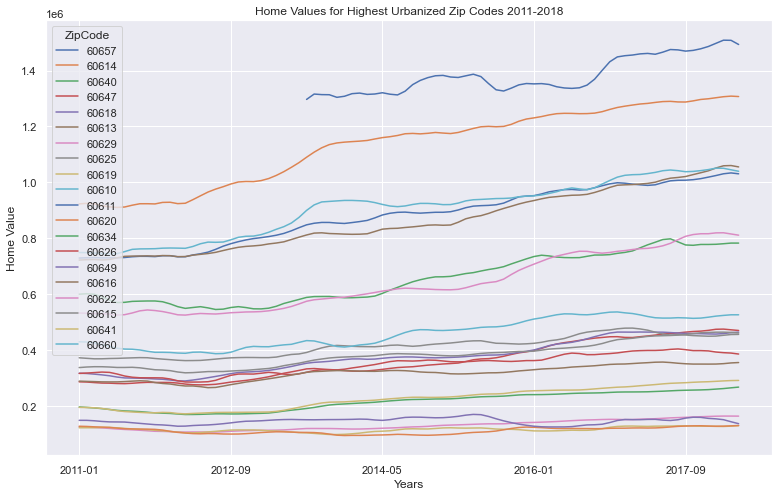

In [61]:
# # fun.plot(plot_df)
# plot_df.plot(figsize=(13, 8))
# plt.title('Home Values for Highest Urbanized Zip Codes 2011-2018')
# plt.xlabel('Years')
# plt.ylabel('Home Value')
# plt.show()

### Note on graph above!
- We notice a zip code here that does not have values before 2013 - 
- I decided here to discard of this zip code as well
- It was zip code 60611
- I then went back and re-filtered my urbanized zip codes to get back to 20
